In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('space_server.csv')
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df=pd.DataFrame(data)

In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

objid
1.237650e+18    10000
Name: objid, dtype: int64
ra
226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64
dec
 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64
u
18.90212    3
18.99697    3
18.98400    3
19.53507    3
19.56350    3
           ..
19.27596    1
19.51822    1
18.23952    1
18.47838    1
18.77445    1
Name: u, Length: 9730, dtype: int64
g
17.55623    3
17.75478    3
17.60766    3
18.31910    3
17.53612    2
           ..
16.79101    1
18.01411    1
16.93613    1
17.68695    1
17.87934    1
Name: g, Length: 9817, dtype: int64
r
15.99986    3
16.48978    3
16.70929    2
17.21182    2
16.27899    2
           ..
19.18255    1
16.03177    1
16.27091    

rerun and objid column have the one unique value in all rows. thus we can drop it

In [6]:
df.drop({'objid','rerun'},axis=1, inplace=True)
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [7]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There are no null value in dataframe.

In [8]:
df.dtypes

ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

ra,dec,u,g,r,i,z,specobjid,redshift are float type;................................                   run,camcol,field,plate,mjd,fiberid are int type............................. class is object type. We have to change the typpe of class to int.

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

here, Galaxy = 0, QSO = 1, , Star = 2

In [10]:
df.dtypes

ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
camcol         int64
field          int64
specobjid    float64
class          int32
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

Thus class is changed to int type

<AxesSubplot:>

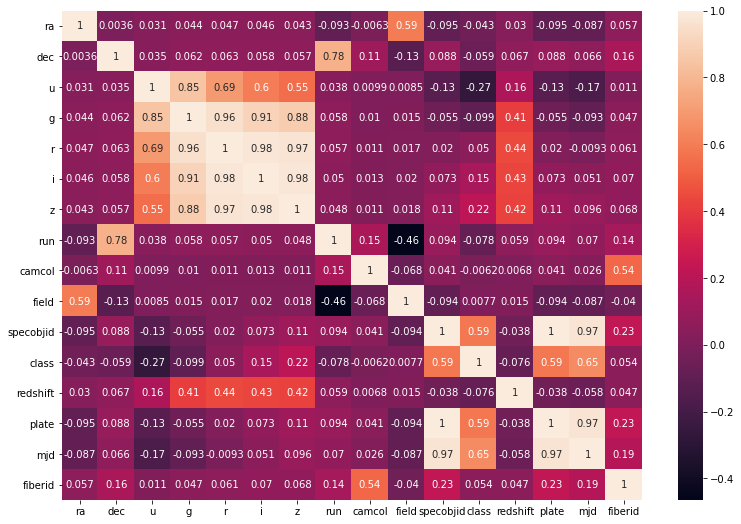

In [11]:
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(), annot=True)

from the corelation graph we can conclude that ra,dec,r,run,camcol,field,redshift & fiberid columns have nearly zero correlation with target Class

In [12]:
df.drop({'ra','dec','run','camcol','field','redshift','fiberid'}, axis=1, inplace=True)
df.head()

,u,g,r,i,z,specobjid,class,plate,mjd
0,19.47406,17.04240,15.94699,15.50342,15.22531,3.722360e+18,2,3306,54922
1,18.66280,17.21449,16.67637,16.48922,16.39150,3.638140e+17,2,323,51615
2,19.38298,18.19169,17.47428,17.08732,16.80125,3.232740e+17,0,287,52023
3,17.76536,16.60272,16.16116,15.98233,15.90438,3.722370e+18,2,3306,54922
4,17.55025,16.26342,16.43869,16.55492,16.61326,3.722370e+18,2,3306,54922


C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


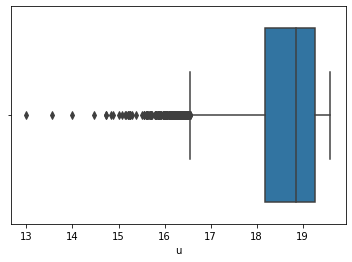

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


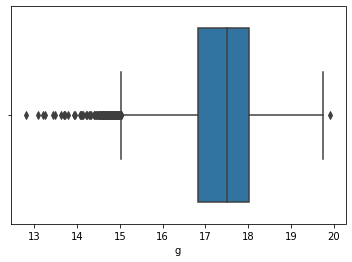

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


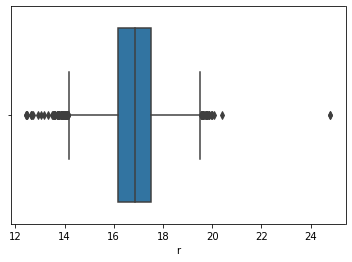

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


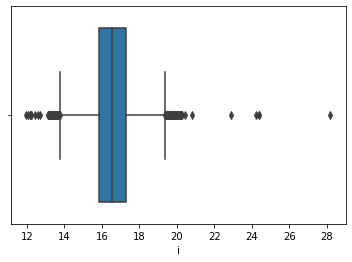

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


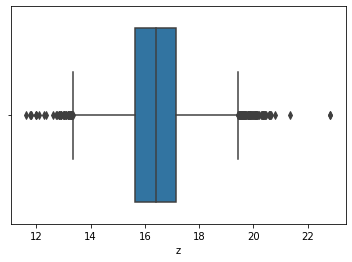

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


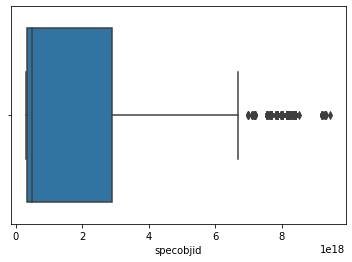

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


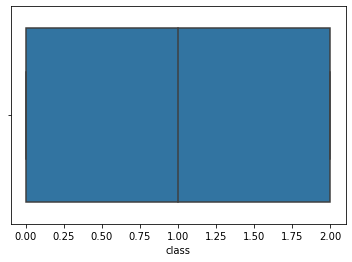

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


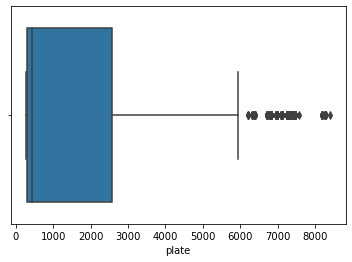

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


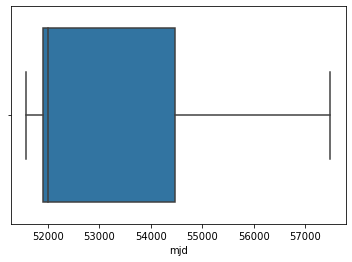

In [13]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

# Removing Outliers

In [14]:
from scipy.stats import zscore
threshold=3
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [15]:
df=new_df

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


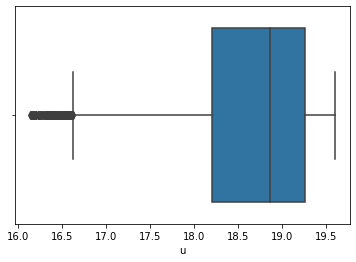

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


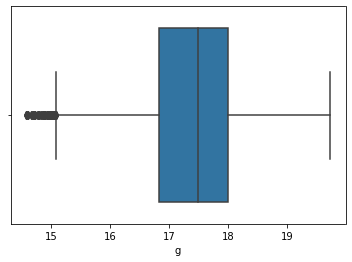

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


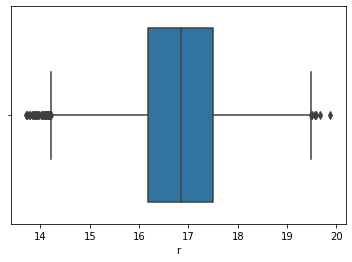

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


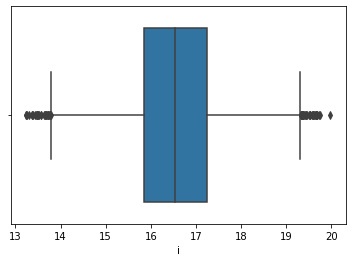

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


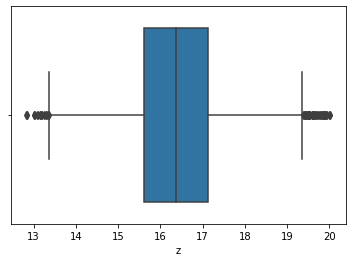

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


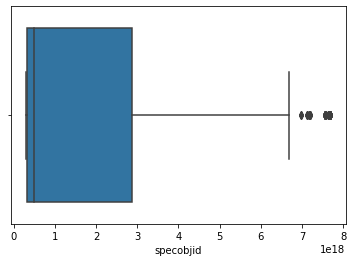

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


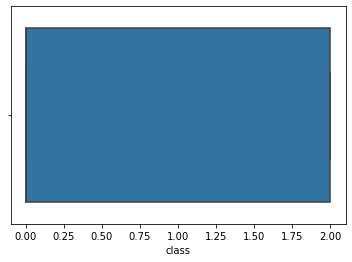

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


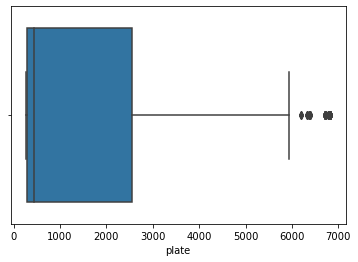

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


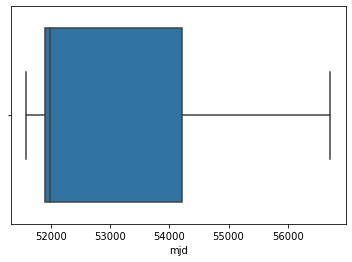

In [16]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

# Removing Skewness

In [17]:
df.skew()

u           -1.003742
g           -0.404606
r           -0.019476
i            0.136806
z            0.221352
specobjid    1.371733
class        0.261109
plate        1.371715
mjd          0.981277
dtype: float64

 Skewness in u,spaceobjid,plate,mjd is high

In [18]:
col=['u','i','specobjid','plate','mjd']
for i in col:
    df[i]=np.log1p(df[i])

In [19]:
df.skew()

u           -1.085414
g           -0.404606
r           -0.019476
i           -0.043753
z            0.221352
specobjid    0.743809
class        0.261109
plate        0.744227
mjd          0.965591
dtype: float64

Sknewness improved in spaceobjid, plate & mjd

In [20]:
df.isnull().sum()

u            0
g            0
r            0
i            0
z            0
specobjid    0
class        0
plate        0
mjd          0
dtype: int64

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


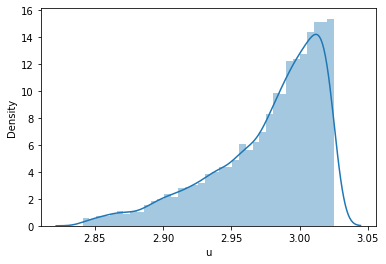

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


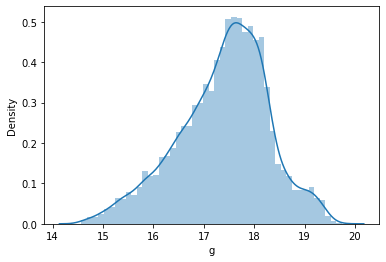

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


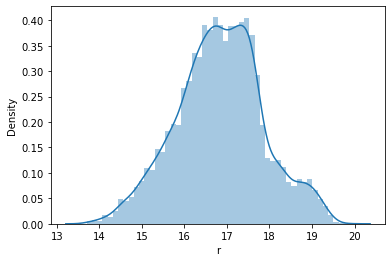

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


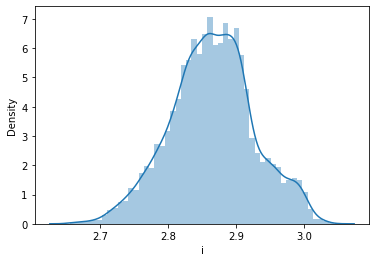

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


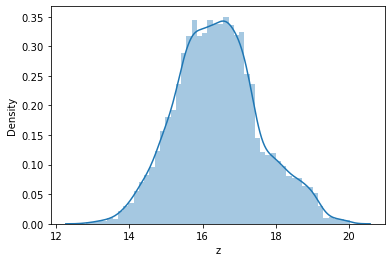

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


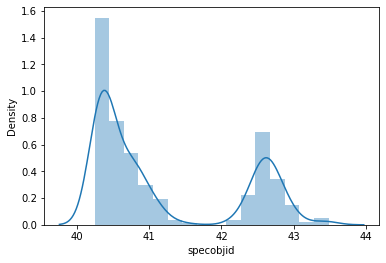

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


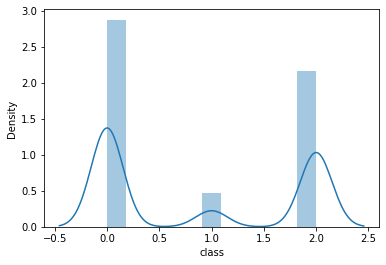

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


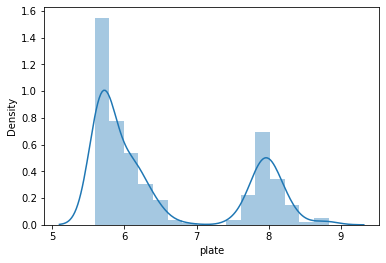

C:\Users\Nitin Singh Tatrari\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


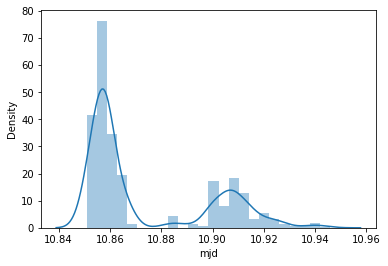

In [21]:
for i in df.columns:
    plt.figure
    sns.distplot(df[i])
    plt.show()

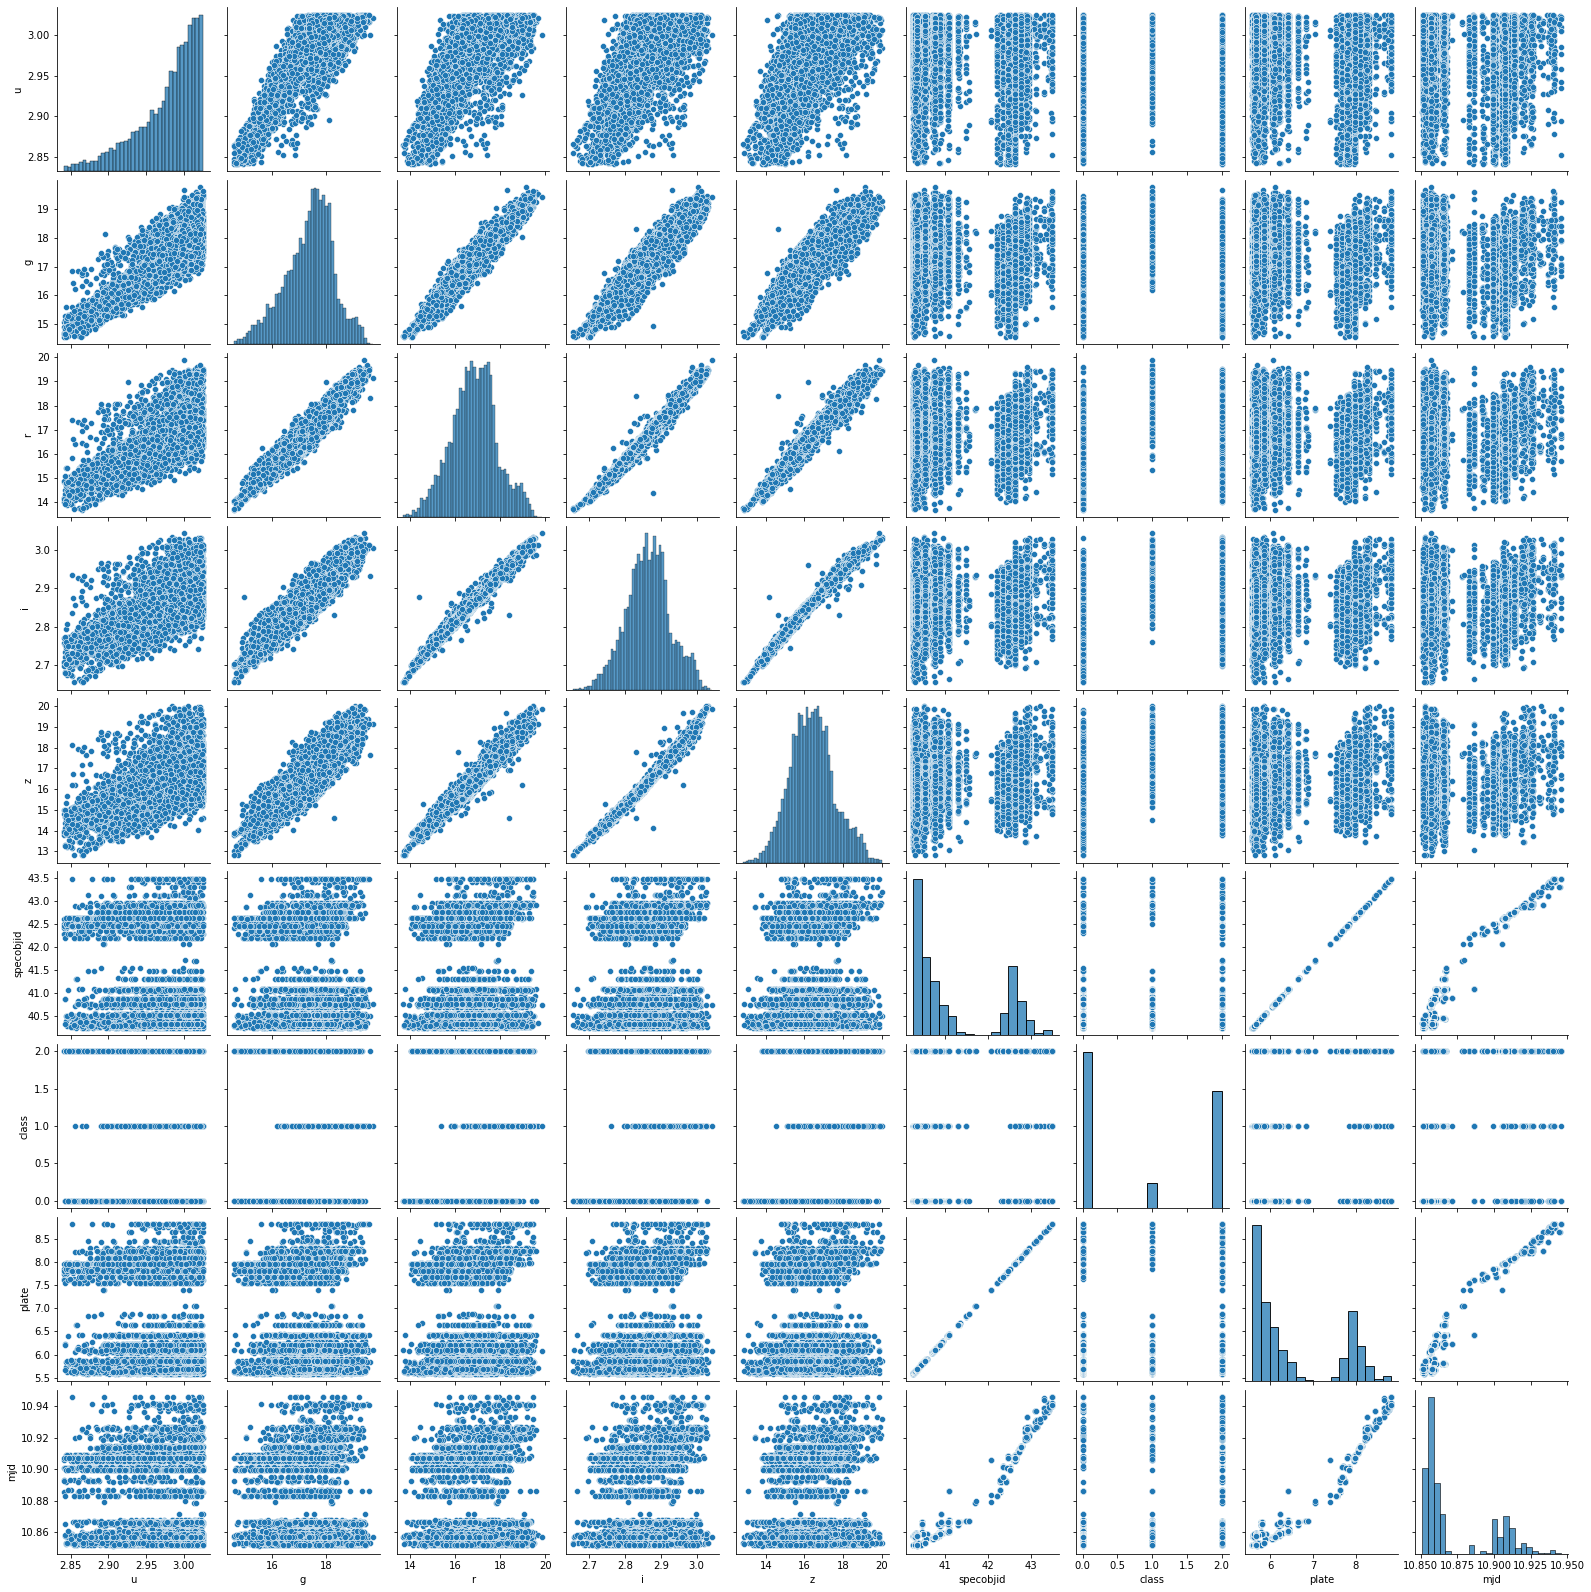

In [22]:
sns.pairplot(df)

In [23]:
x=df.drop(['class'],axis=1)
x.head(5)

,u,g,r,i,z,specobjid,plate,mjd
0,3.019159,17.04240,15.94699,2.803568,15.22531,42.760890,8.103797,10.913687
1,2.978729,17.21449,16.67637,2.861585,16.39150,40.435419,5.780744,10.851587
2,3.014700,18.19169,17.47428,2.895211,16.80125,40.317277,5.662960,10.859460
3,2.932013,16.60272,16.16116,2.832173,15.90438,42.760892,8.103797,10.913687
4,2.920483,16.26342,16.43869,2.865334,16.61326,42.760892,8.103797,10.913687


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.04023655, -0.38045155, -0.87470861, ...,  1.55055119,
         1.55068688,  1.63307426],
       [ 0.04020232, -0.19014684, -0.16272464, ..., -0.74390719,
        -0.74402055, -0.88989315],
       [ 0.92995677,  0.89048399,  0.61615486, ..., -0.86047415,
        -0.86036641, -0.57001725],
       ...,
       [-0.45565008,  0.05756223,  0.22827207, ..., -0.42361316,
        -0.42392487, -0.68419349],
       [ 0.31550183,  0.57973075,  0.67202966, ..., -0.42361316,
        -0.42392487, -0.68419349],
       [ 0.7996234 , -0.00900958, -0.52482732, ..., -0.4236112 ,
        -0.42392487, -0.68419349]])

In [25]:
x.shape

(9457, 8)

In [26]:
y=df['class']
y.head(5)

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

In [27]:
y.shape

(9457,)

# MODEL SELECTION

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=43)

In [30]:
model=[DecisionTreeClassifier(), KNeighborsClassifier(), SVC()]
for i in model:
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Accuracy score :', accuracy_score(y_test,pred))
    print('Confusion matrix :\n', confusion_matrix(y_test,pred))
    print('Classification report: \n ', classification_report(y_test,pred))
    print('*************************************************')
    print('\n')

DecisionTreeClassifier()
Accuracy score : 0.9170190274841438
Confusion matrix :
 [[937  10  51]
 [  9 143  12]
 [ 59  16 655]]
Classification report: 
                precision    recall  f1-score   support

           0       0.93      0.94      0.94       998
           1       0.85      0.87      0.86       164
           2       0.91      0.90      0.90       730

    accuracy                           0.92      1892
   macro avg       0.90      0.90      0.90      1892
weighted avg       0.92      0.92      0.92      1892

*************************************************


KNeighborsClassifier()
Accuracy score : 0.9344608879492601
Confusion matrix :
 [[946   5  47]
 [  6 150   8]
 [ 50   8 672]]
Classification report: 
                precision    recall  f1-score   support

           0       0.94      0.95      0.95       998
           1       0.92      0.91      0.92       164
           2       0.92      0.92      0.92       730

    accuracy                           0.93  


# CROSS VALIDATION

In [31]:
for i in model:
    cross=cross_val_score(i,x,y,cv=5)
    print(i)
    print('Score:',cross)
    print('Mean_score:',cross.mean())
    print('STD_score:',cross.std())
    print('****************************\n')

DecisionTreeClassifier()
Score: [0.92283298 0.90169133 0.91485986 0.91115812 0.91750397]
Mean_score: 0.9136092517913381
STD_score: 0.007069015220342817
****************************

KNeighborsClassifier()
Score: [0.93868922 0.91860465 0.92649392 0.9132734  0.94288736]
Mean_score: 0.9279897097970468
STD_score: 0.011342891775766532
****************************

SVC()
Score: [0.94714588 0.92600423 0.93601269 0.92173453 0.95557906]
Mean_score: 0.937295277619703
STD_score: 0.01266965343897996
****************************



SVC() have the best score.

# HYPERPARAMETER TUNING

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('rbf','linear'),'C':[1,10]}
svc=SVC()
Grid=GridSearchCV(svc,parameters)
Grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('rbf', 'linear')})

In [33]:
Grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [34]:
svc2=SVC(C=10)
svc2.fit(x_train,y_train)
pred2=svc2.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred2))
print('Confusion matrix :\n', confusion_matrix(y_test,pred2))
print('Classification report: \n ', classification_report(y_test,pred2))

Accuracy score : 0.9661733615221987
Confusion matrix :
 [[964   5  29]
 [  7 152   5]
 [ 14   4 712]]
Classification report: 
                precision    recall  f1-score   support

           0       0.98      0.97      0.97       998
           1       0.94      0.93      0.94       164
           2       0.95      0.98      0.96       730

    accuracy                           0.97      1892
   macro avg       0.96      0.96      0.96      1892
weighted avg       0.97      0.97      0.97      1892



# SAVING THE BEST MODEL

In [35]:
import joblib
joblib.dump(svc2,'space_server.pkl')

['space_server.pkl']